In [219]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import  RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier 

df=pd.read_csv("Iris.csv")

In [220]:
df.shape

(1000, 6)

In [221]:
print(df.shape)
print(df.isnull().sum())

(1000, 6)
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [222]:
print(df.duplicated().sum())

0


In [223]:
print(df.describe())
print(df.info())

                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  1000.000000    1000.000000   1000.000000    1000.000000   1000.000000
mean     72.999451       5.805189      3.057376       3.671465      1.155769
std      42.767427       0.819300      0.439588       1.750365      0.754746
min       0.899495       4.212979      1.930020       0.915695      0.009613
25%      36.021837       5.088139      2.778411       1.558350      0.293846
50%      72.002800       5.732631      3.022537       4.210619      1.297124
75%     108.969464       6.383904      3.341128       5.046233      1.784940
max     149.997163       7.921202      4.508429       6.980546      2.604363
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1000 non-null   float64
 1   SepalLengthCm  1000 non-null   float64
 2   SepalWidthCm   1000 n

In [224]:
df=df.drop("Id",axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.186285,3.459344,1.485870,0.158888,Iris-setosa
1,4.836780,3.055716,1.521426,0.299810,Iris-setosa
2,4.684503,3.175767,1.266442,0.232915,Iris-setosa
3,4.638799,3.074804,1.573948,0.175652,Iris-setosa
4,5.000787,3.621034,1.492370,0.204384,Iris-setosa
...,...,...,...,...,...
995,5.720862,2.962909,4.227393,1.218622,Iris-versicolor
996,5.729083,2.965927,4.175202,1.268898,Iris-versicolor
997,6.241265,2.841405,4.239296,1.302700,Iris-versicolor
998,5.105469,2.466088,2.949141,1.081165,Iris-versicolor


In [225]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"{col}: min = {df[col].min():.3f}, max = {df[col].max():.3f}")

SepalLengthCm: min = 4.213, max = 7.921
SepalWidthCm: min = 1.930, max = 4.508
PetalLengthCm: min = 0.916, max = 6.981
PetalWidthCm: min = 0.010, max = 2.604


In [226]:
df['Species'].value_counts()

Species
Iris-setosa        350
Iris-versicolor    350
Iris-virginica     300
Name: count, dtype: int64

In [227]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.186285,3.459344,1.485870,0.158888,0
1,4.836780,3.055716,1.521426,0.299810,0
2,4.684503,3.175767,1.266442,0.232915,0
3,4.638799,3.074804,1.573948,0.175652,0
4,5.000787,3.621034,1.492370,0.204384,0
...,...,...,...,...,...
995,5.720862,2.962909,4.227393,1.218622,1
996,5.729083,2.965927,4.175202,1.268898,1
997,6.241265,2.841405,4.239296,1.302700,1
998,5.105469,2.466088,2.949141,1.081165,1


In [228]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in df.columns:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col],
                              np.where(df[col] > upper_bound[col], upper_bound[col],df[col]))

In [229]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("Outliers count per column:\n", outliers.sum())

Outliers count per column:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [230]:
df.skew()

SepalLengthCm    0.345500
SepalWidthCm     0.244252
PetalLengthCm   -0.206353
PetalWidthCm    -0.024519
Species          0.090823
dtype: float64

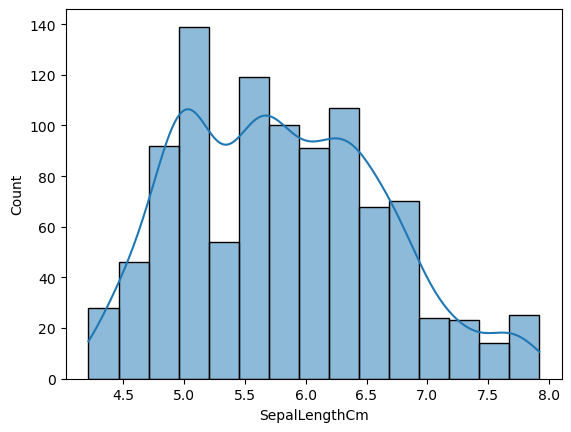

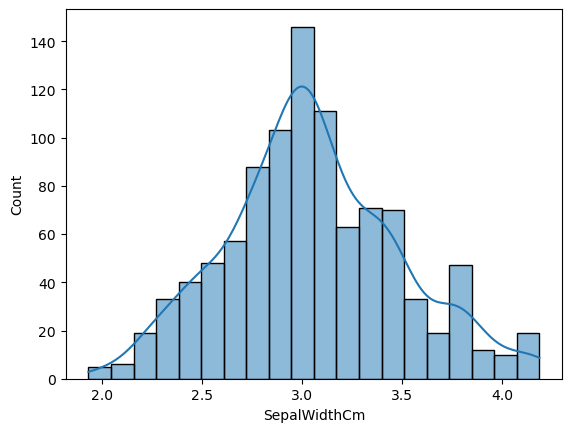

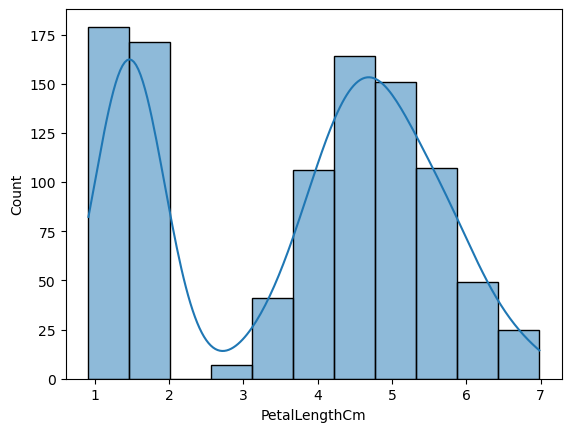

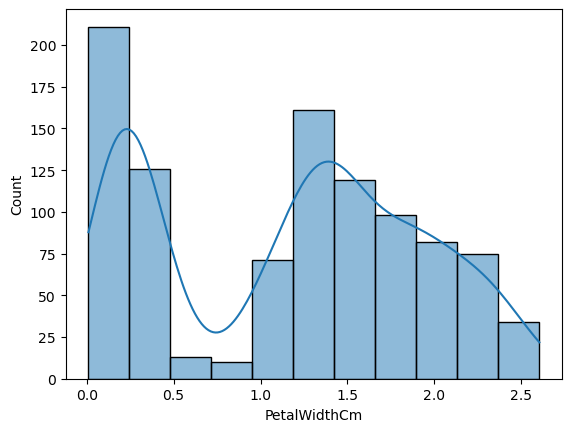

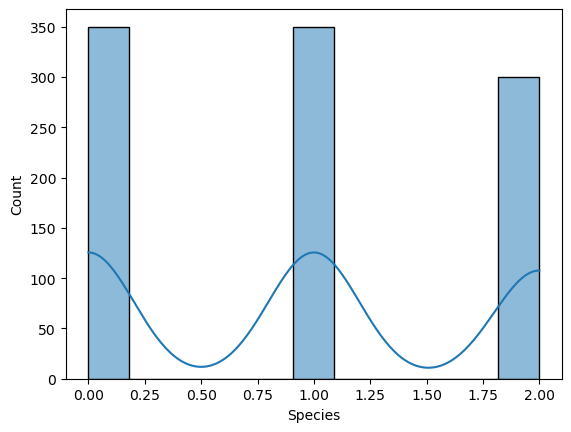

In [231]:
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()
    

<Axes: >

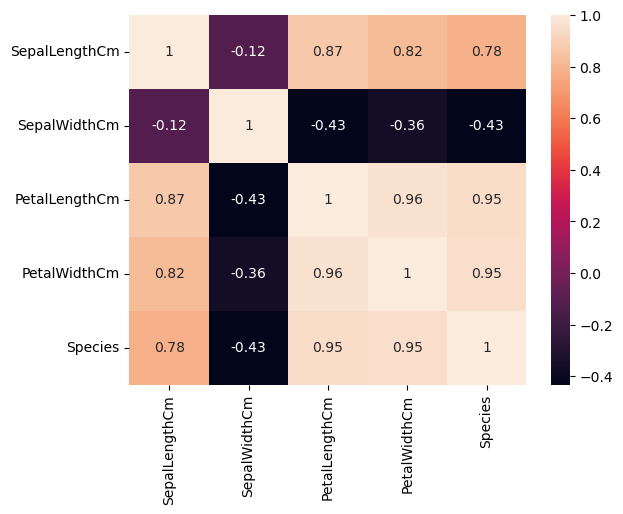

In [232]:
sns.heatmap(df.corr(),annot=True)

In [233]:
df.to_csv("Iris_processed.csv", index=False)